In [116]:
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [117]:
Data = os.path.realpath("Data")


In [126]:
clmovies = pd.read_csv("Data/movies_clean.csv")

#### On regadant les graphique on remarque, que les votes des utilisateurs et les nombres des avis des critique ont une infuence sur le score IMDB  

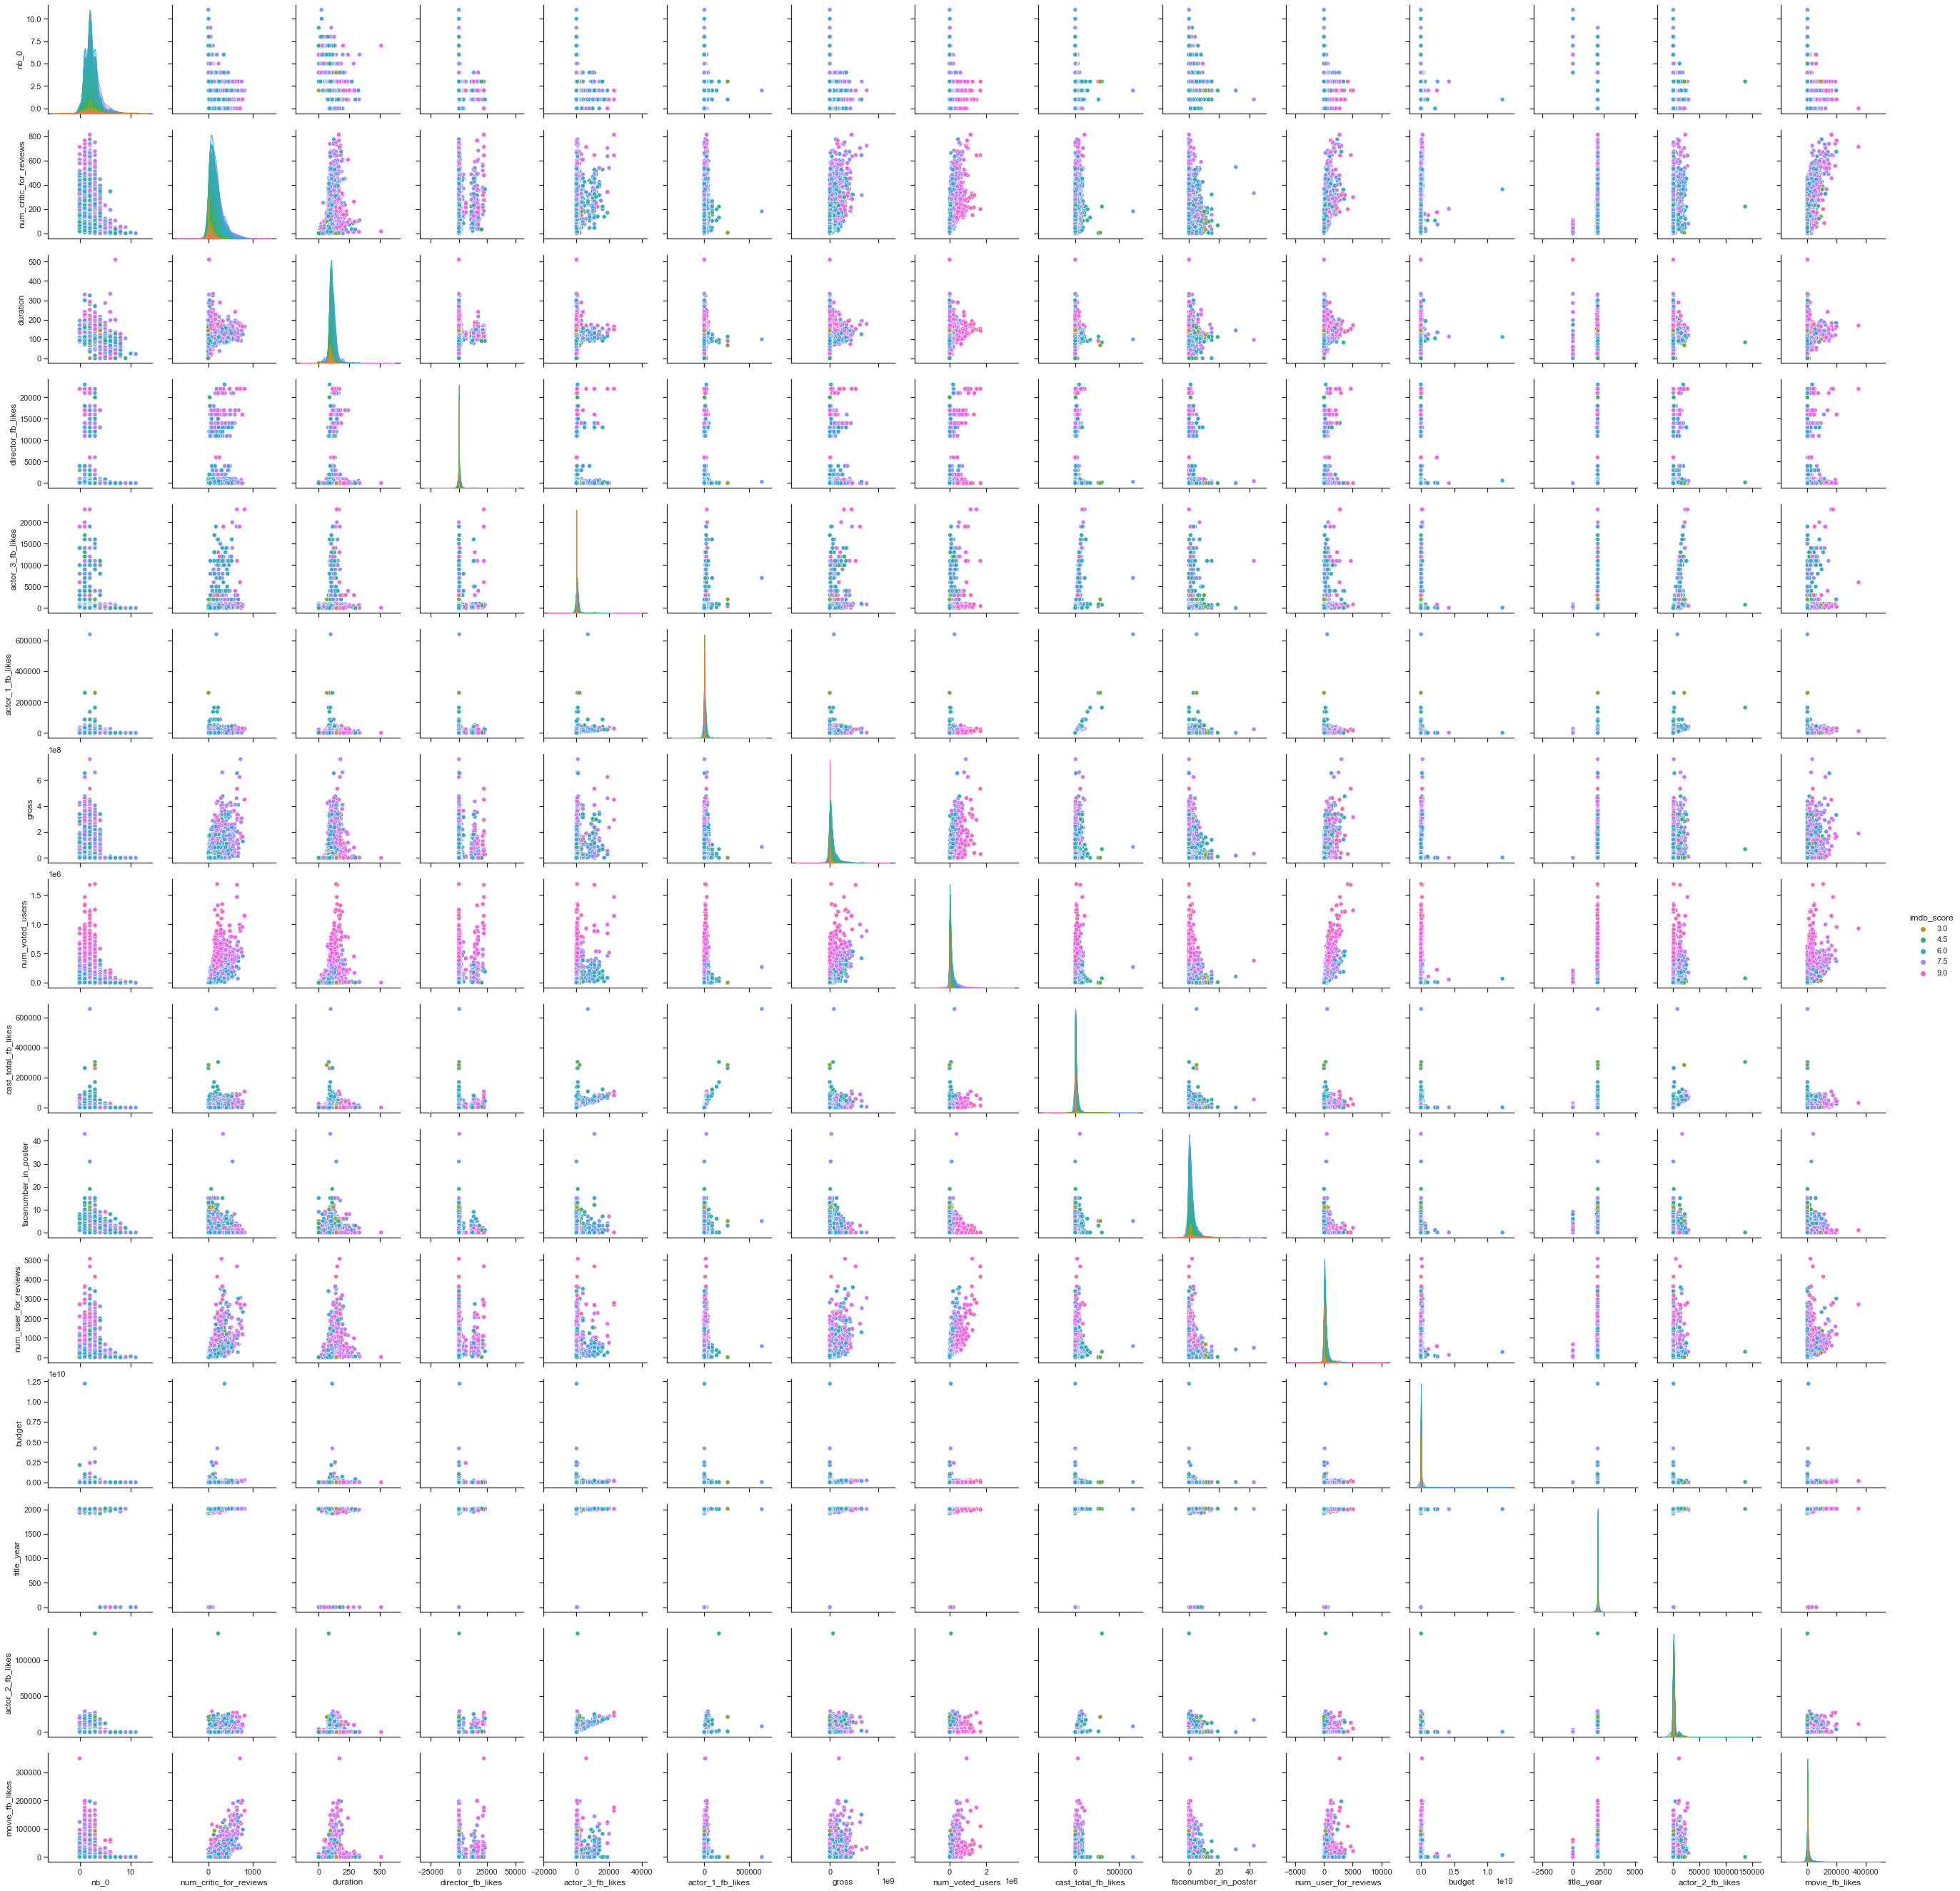

In [82]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(clmovies.iloc[:,:-26], hue="imdb_score", palette="husl");

In [83]:
clmovies.describe()

nb_0  num_critic_for_reviews     duration  director_fb_likes  \
count  4996.000000             4996.000000  4996.000000        4996.000000   
mean      2.240993              138.539031   106.908927         674.718975   
std       1.181764              121.671408    25.843525        2794.666698   
min       0.000000                0.000000     0.000000           0.000000   
25%       1.000000               48.000000    93.000000           6.000000   
50%       2.000000              108.000000   103.000000          44.000000   
75%       3.000000              193.000000   118.000000         189.000000   
max      11.000000              813.000000   511.000000       23000.000000   

       actor_3_fb_likes  actor_1_fb_likes         gross  num_voted_users  \
count       4996.000000       4996.000000  4.996000e+03     4.996000e+03   
mean         636.610689       6547.949560  4.033352e+07     8.345991e+04   
std         1640.046833      15055.573306  6.425036e+07     1.380960e+05   
min            0.000000          0.000000  0.000000e+00     5.000000e+00   
25%          130.000000        610.750000  6.104865e+05     8.560000e+03   
50%          366.000000        984.000000  1.629338e+07     3.426050e+04   
75%          634.250000      11000.000000  5.161915e+07     9.610425e+04   
max        23000.000000     640000.000000  7.605058e+08     1.689764e+06   

       cast_total_fb_likes  facenumber_in_poster  ...    Adventure  \
count          4996.000000           4996.000000  ...  4996.000000   
mean           9674.967974              1.365693  ...     0.182946   
std           18166.468050              2.013512  ...     0.386661   
min               0.000000              0.000000  ...     0.000000   
25%            1406.500000              0.000000  ...     0.000000   
50%            3085.500000              1.000000  ...     0.000000   
75%           13725.500000              2.000000  ...     0.000000   
max          656730.000000             43.000000  ...     1.000000   

          Thriller  Documentary    Biography      Mystery        Crime  \
count  4996.000000  4996.000000  4996.000000  4996.000000  4996.000000   
mean      0.279223     0.024019     0.058447     0.098679     0.176541   
std       0.448662     0.153124     0.234610     0.298260     0.381318   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

             Music    Film-Noir       Horror      History  
count  4996.000000  4996.000000  4996.000000  4996.000000  
mean      0.064852     0.001201     0.111289     0.041033  
std       0.246289     0.034638     0.314521     0.198386  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000  

[8 rows x 42 columns]

In [84]:
clmovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4996 entries, 0 to 4995
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   nb_0                    4996 non-null   int64  
 1   director_name           4893 non-null   object 
 2   num_critic_for_reviews  4996 non-null   float64
 3   duration                4996 non-null   float64
 4   director_fb_likes       4996 non-null   float64
 5   actor_3_fb_likes        4996 non-null   float64
 6   actor_2_name            4983 non-null   object 
 7   actor_1_fb_likes        4996 non-null   float64
 8   gross                   4996 non-null   float64
 9   actor_1_name            4989 non-null   object 
 10  movie_title             4996 non-null   object 
 11  num_voted_users         4996 non-null   int64  
 12  cast_total_fb_likes     4996 non-null   int64  
 13  actor_3_name            4974 non-null   object 
 14  facenumber_in_poster    4996 non-null   

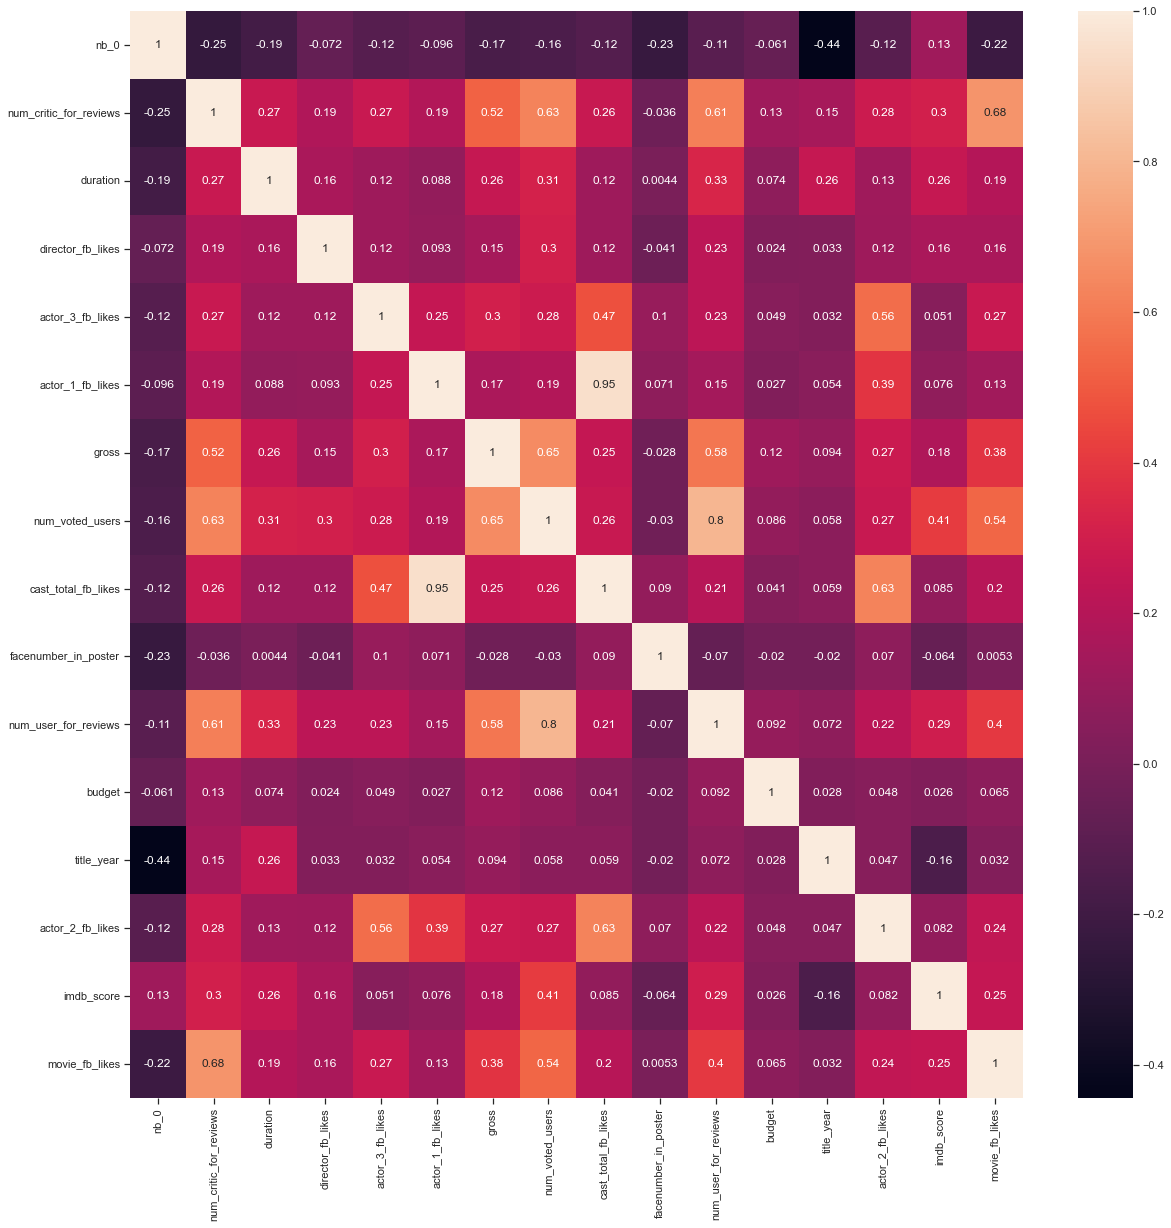

In [85]:
plt.figure(figsize=(20,20))
sns.heatmap(clmovies.iloc[:,:-26].corr(),annot=True);

### fonction pour selectionner les variable numériques et les variables catégorielles

In [127]:
def categorical_col(data):
    return list(data.select_dtypes(include="object").columns)
def numeric_col(data):
    return list(data.select_dtypes(exclude="object").columns)

In [141]:
data_mov = clmovies.copy()

In [142]:
categ = categorical_col(data_mov)

In [143]:
num = numeric_col(data_mov)

In [144]:
print("La taille des variables catégorielles: ",data_mov[categ].shape," \nLa taille des variables numériques: ", data_mov[num].shape)

La taille des variables catégorielles:  (4996, 8)  
La taille des variables numériques:  (4996, 42)


In [145]:
data_mov.drop("nb_0", axis=1, inplace=True)

In [146]:
data_mov = pd.get_dummies(data_mov, columns=categ)

In [147]:
data_mov.shape

(4996, 16131)

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf

In [149]:
#instantation du scaler
sc = StandardScaler()

In [153]:
data_mov.drop(columns=["gross","budget"], axis=1, inplace=True)

In [154]:
#Diviser les données en train et test
train, test = train_test_split(data_mov, test_size=0.33, random_state=0)

In [155]:
print("train: ", train.shape, "\ntest: ", test.shape)

train:  (3347, 16129) 
test:  (1649, 16129)


##### Suppression des variables gross et budget car elles contiennent des valeurs  abérantes

#### Déclaration des variables X_train et X_test

In [156]:
X_train = train.drop("imdb_score", axis=1)
X_test = test.drop("imdb_score", axis=1)

#### Déclaration des tagets train et test

In [157]:
y_train = train.imdb_score
y_test = test.imdb_score

### La mise à l'échelle des variables avec le StandarScaler

In [158]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

## **6. Une régression linéaire**

In [159]:
#instantation du modèle 
model_lr = LinearRegression()
model_lr.fit(X_train_std, y_train)

LinearRegression()

In [161]:
# Évaluation du modèle
model_lr.score(X_train_std,y_train)

0.9999660490466089

In [163]:
# Récupération des coefficients
print(f"{model_lr.intercept_=} \n {model_lr.coef_=}")

model_lr.intercept_=6.428705986229558 
 model_lr.coef_=array([ 3.05281836e+09,  3.26415770e+09, -8.49762216e+09, ...,
        0.00000000e+00, -1.12190950e+09, -5.10873115e+09])


In [169]:
# Nouvelles prédictions
y_pred = model_lr.predict(X_test_std)

In [170]:
y_pred.shape

(1649,)

In [201]:
li = np.linspace(-5,5,53980416).reshape(3347,16128)

In [202]:
li.shape

(3347, 16128)

In [190]:
X_train_std.shape

(3347, 16128)

In [189]:
y_train.shape

(3347,)

In [192]:
X_train_std.shape

(3347, 16128)

In [203]:
model_lr.predict(li).shape

(3347,)

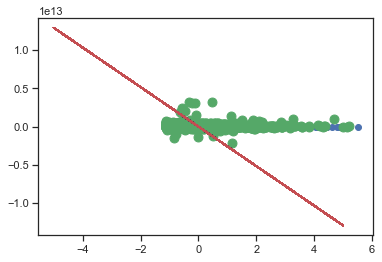

In [206]:
# Visualisation
plt.scatter(X_train_std[:,0],y_train)
plt.plot(li, model_lr.predict(li), c='r')
plt.scatter(X_test_std[:,0], y_pred, c='g', s=80);

In [207]:
# Construction le modèle
from statsmodels.api import OLS, add_constant
X = add_constant(X_train_std)
model2 = OLS(y_train, X)
res = model2.fit()

In [208]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             imdb_score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     8234.
Date:                Fri, 14 Jan 2022   Prob (F-statistic):           6.56e-54
Time:                        00:21:37   Log-Likelihood:                 17857.
No. Observations:                3347   AIC:                        -2.908e+04
Df Residuals:                      30   BIC:                            -8794.
Df Model:                        3316                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4287      0.000   3.02e+04      0.000       6.428       6.429
x1             3.6701      7.372      0.498      0.622     -11.385      18.725
x2             1.8341      3.457      0.531      0.600      -5.226       8.895
x3             1.5487      3.149      0.492      0.626      -4.883       7.981
x4             6.6976     15.500      0.432      0.669     -24.958      38.353
x5            60.0045    140.372      0.427      0.672    -226.673     346.682
x6           -31.9459     58.375     -0.547      0.588    -151.164      87.272
x7           -72.2541     21.095     -3.425      0.002    -115.336     -29.172
x8            -0.0474      1.485     -0.032      0.975      -3.080       2.985
x9             1.0615      7.039      0.151      0.881     -13.313      15.436
x10           -0.0320      1.447     -0.022      0.983      -2.988       2.924
x11           19.6540      8.198      2.397      0.023       2.910      36.397
x12            3.3976      6.285      0.541      0.593      -9.438      16.233
x13            0.7809      1.570      0.497      0.622      -2.425       3.987
x14           -0.2861      0.498     -0.574      0.570      -1.304       0.732
x15           -0.1233      0.534     -0.231      0.819      -1.214       0.968
x16           -0.1253      0.368     -0.341      0.736      -0.877       0.626
x17           -0.2700      0.882     -0.306      0.762      -2.072       1.532
x18           -0.0647      0.234     -0.277      0.784      -0.542       0.412
x19           -0.3473      0.626     -0.555      0.583      -1.626       0.932
x20           -0.0320      0.222     -0.144      0.886      -0.484       0.420
x21           -0.0286      0.152     -0.187      0.853      -0.340       0.283
x22           -0.4918      1.656     -0.297      0.769      -3.875       2.891
x23           -0.0399      0.241     -0.166      0.869      -0.531       0.452
x24            0.1285      0.311      0.413      0.683      -0.507       0.764
x25            0.7198      1.796      0.401      0.691      -2.949       4.389
x26            0.4557      0.920      0.495      0.624      -1.423       2.334
x27           -0.2424      0.490     -0.494      0.625      -1.244       0.759
x28           -0.0517      0.234     -0.221      0.827      -0.529       0.426
x29            0.7998      1.444      0.554      0.584      -2.150       3.750
x30           -0.0433      1.444     -0.030      0.976      -2.992       2.906
x31           -0.3373      1.579     -0.214      0.832      -3.563       2.888
x32           -0.2330      0.670     -0.348      0.730      -1.602       1.136
x33           -0.0410      0.324     -0.126      0.900      -0.703       0.621
x34            0.2342      1.321      0.177      0.860      -2.464       2.932
x35           -0.3158      1.116     -0.283      0.779      -2.594       1.962
x3

In [209]:
# Évaluation du modèle
res.rsquared

0.9999989012916171

In [210]:
# Récupération des coefficients
res.params

const     6.428682
x1        3.670096
x2        1.834053
x3        1.548654
x4        6.697610
            ...   
x16124   -0.036673
x16125   -0.008189
x16126    0.000000
x16127   -0.205179
x16128   -0.012251
Length: 16129, dtype: float64

In [211]:
# Calcul du MSE : erreur qui nous servira de base d'amélioration possible
from sklearn.metrics import mean_squared_error
error0 = mean_squared_error(model_lr.predict(X_test_std),y_test)
error0

6.674821229835809e+22

## La régression Ridge

In [212]:
# Modèle de régression Ridge
from sklearn.linear_model import Ridge
ridge = Ridge()

In [213]:
# Coefficients de régularisation à tester
alphas = np.logspace(-5, 5, 200)

In [214]:
# On entraîne un modèle pour chaque valeur de alpha et on va regarder l'erreur correspondante
coefs = []
errors = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train_std, y_train)
    coefs.append(ridge.coef_)
    #errors.append([error0, mean_squared_error(reglin.predict(X_test),y_test)])
    errors.append(mean_squared_error(ridge.predict(X_test_std),y_test))

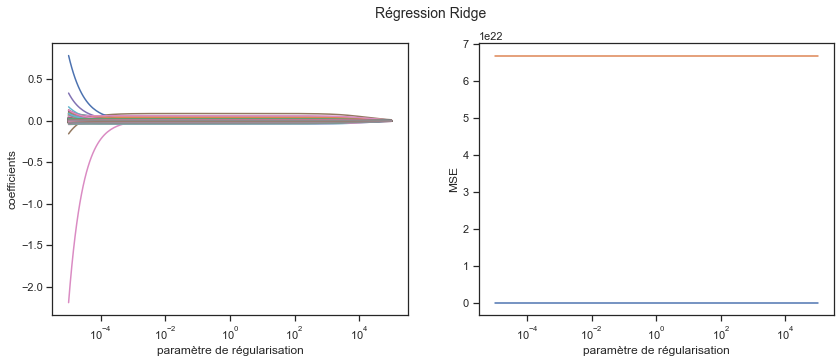

In [215]:
# Affichage de 2 courbes
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,5))

# Le chemin de régularisation : évolution des coefficients en fonction du paramètre de régularisation
ax1.plot(alphas, coefs)
ax1.set_xscale('log')
ax1.set_xlabel('paramètre de régularisation')
ax1.set_ylabel('coefficients')

# L'évolution de l'erreur de prédiction sur le test set en fonction du paramètre de régularisation
ax2.plot(alphas, errors, [10**-5,10**5],[error0,error0])
ax2.set_xscale('log')
ax2.set_xlabel('paramètre de régularisation')
ax2.set_ylabel('MSE')

fig.suptitle('Régression Ridge',fontsize=14)
plt.show()

In [216]:
# Erreur minimale de la régression Ridge
min(errors)

0.9586623011066235

In [217]:
# Alpha qui minimise l'erreur
alphas[np.argmin(errors)]

0.5291978735958447